In [1]:
# DATA MUNGING

# Missing Value Treatment
# Outliers

# ISSUES
# Inaccurate analysis
# Modeling won't work in many cases

# SOLUTIONS
# Deletion
# Imputation

In [2]:
import numpy as np
import pandas as pd
import os

raw_data_path=os.path.join(os.path.pardir,'data','raw')
train_file_path=os.path.join(raw_data_path,'train.csv')
test_file_path=os.path.join(raw_data_path,'test.csv')

train_df=pd.read_csv(train_file_path,index_col="PassengerId")
test_df=pd.read_csv(test_file_path,index_col="PassengerId")

test_df["Survived"]=-888

df=pd.concat((train_df,test_df),axis=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [3]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [4]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [5]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [6]:
# df.Embarked.fillna('S',inplace=True)


In [7]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [8]:
df.Embarked.fillna('C',inplace=True)

In [9]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [11]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [12]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
33,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,3,female,0,1,335677
37,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,3,male,0,1,2677


In [13]:
df.Age.plot(kind="hist",bins=20,color='c');

In [14]:
df.Age.median()

28.0

In [15]:
df.Age.mean()

29.881137667304014

In [16]:
pd.options.display.max_rows=15

In [17]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
...,...,...,...,...,...,...,...,...,...,...,...
1274,NaN,NaN,S,14.5000,"Risien, Mrs. Samuel (Emma)",0,3,female,0,-888,364498


In [18]:
df.groupby('Sex').median()

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.0,23.0000,0.0,2.0,0.0,0.5
male,28.0,11.8875,0.0,3.0,0.0,0.0


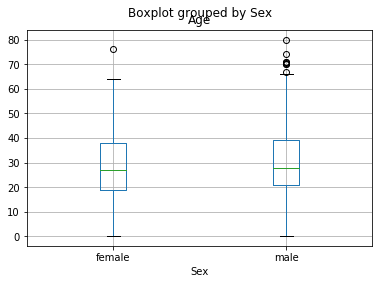

In [19]:
df[df.Age.notnull()].boxplot('Age','Sex')

In [20]:
df.groupby("Sex").Age.transform('median')

PassengerId
1       28.0
2       27.0
3       27.0
4       27.0
5       28.0
6       28.0
7       28.0
        ... 
1303    27.0
1304    27.0
1305    28.0
1306    27.0
1307    28.0
1308    28.0
1309    28.0
Name: Age, Length: 1309, dtype: float64

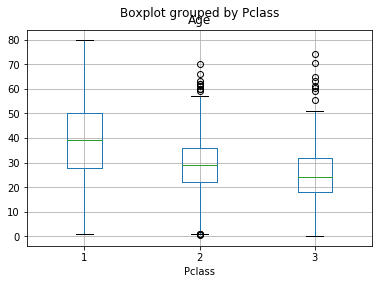

In [21]:
df[df.Age.notnull()].boxplot('Age','Pclass')

In [22]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
                              ...                        
1303      Minahan, Mrs. William Edward (Lillian E Thorpe)
1304                       Henriksson, Miss. Jenny Lovisa
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [23]:
def GetTitle(name):
    first_name_with_title=name.split(',')[1]
    title=first_name_with_title.split('.')[0]
    title=title.strip().lower()
    return title


In [28]:
df['Title']=df.Name.map(lambda x: GetTitle(x))

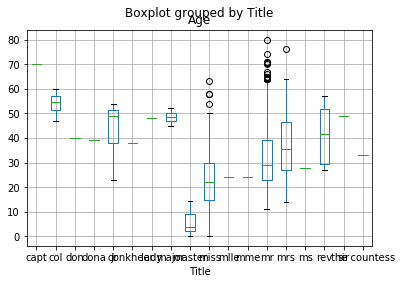

In [29]:
df[df.Age.notnull()].boxplot('Age','Title');

In [33]:
title_age_median=df.groupby('Title').Age.transform('median')

In [34]:
df.Age.fillna(title_age_median,inplace=True)

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [38]:
df[df.Fare.isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701,mr


In [42]:
df[df.Fare.notnull()].groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [52]:
fare_median=df.groupby('Pclass').Fare.transform('median');

In [57]:
df.Fare.fillna(fare_median)

PassengerId
1         7.2500
2        71.2833
3         7.9250
4        53.1000
5         8.0500
6         8.4583
7        51.8625
          ...   
1303     90.0000
1304      7.7750
1305      8.0500
1306    108.9000
1307      7.2500
1308      8.0500
1309     22.3583
Name: Fare, Length: 1309, dtype: float64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [60]:
%%HTML
<h1> WORKING WITH OUTLIERS </h1>

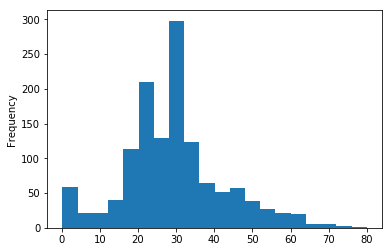

In [61]:
df.Age.plot(kind='hist', bins=20)

In [63]:
df[df.Age>70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,mrs


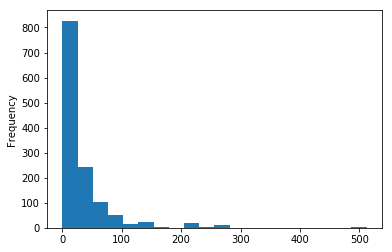

In [64]:
df.Fare.plot(kind='hist',bins=20)

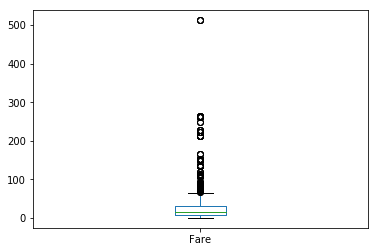

In [65]:
df.Fare.plot(kind='box')

In [66]:
df.loc[df.Fare==df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,mrs


In [67]:
LogFare=np.log(df.Fare+1.0)

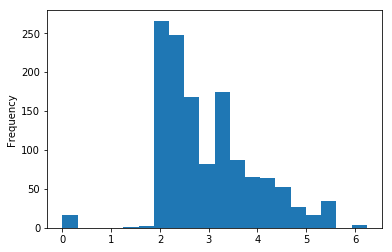

In [69]:
LogFare.plot(kind='hist',bins=20);

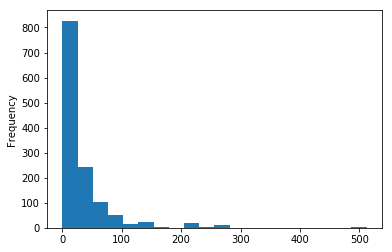

In [72]:
df.Fare.plot(kind='hist',bins=20);

In [73]:
%%HTML
<h1>Binning</h1>

In [75]:
pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high'])

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
6             low
7       very_high
          ...    
1303    very_high
1304     very_low
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

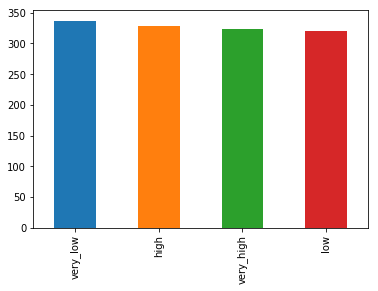

In [78]:
pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar');

In [79]:
df['Fare_Bin']=pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high'])

In [80]:
df


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,mr,very_low
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,mrs,very_high
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,miss,low
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,mrs,very_high
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,mr,low
6,29.0,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877,mr,low
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463,mr,very_high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1,female,1,-888,19928,mrs,very_high


In [82]:
%%HTML
<h1> FEATURE ENGINEERING</h1>

In [84]:
# TRANSFORMATION
# CREATION
# SELECTION
# Domain_Knowledge + Technical_Expertise

In [85]:
df['AgeState']=np.where(df.Age>=18,'Adult','Child')

In [100]:
df.AgeState.value_counts()


Adult    1147
Child     162
Name: AgeState, dtype: int64

In [101]:
pd.crosstab(df.Survived[df.Survived!=-888],df.AgeState[df.Survived!=-888])

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


In [102]:
df['Family_Size']=df.SibSp+df.Parch+1

In [103]:
df

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,Family_Size
PassengerId,,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,mr,very_low,Adult,2
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,mrs,very_high,Adult,2
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,miss,low,Adult,1
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,mrs,very_high,Adult,2
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,mr,low,Adult,1
6,29.0,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877,mr,low,Adult,1
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463,mr,very_high,Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1,female,1,-888,19928,mrs,very_high,Adult,2


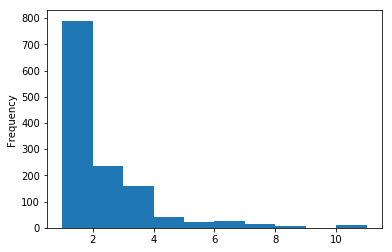

In [104]:
df.Family_Size.plot(kind='hist')

In [105]:
df[df.Family_Size>8]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,Family_Size
PassengerId,,,,,,,,,,,,,,,
160,4.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,0,CA. 2343,master,very_high,Child,11
181,22.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,0,CA. 2343,miss,very_high,Adult,11
202,29.0,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,0,CA. 2343,mr,very_high,Adult,11
325,29.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,0,CA. 2343,mr,very_high,Adult,11
793,22.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,0,CA. 2343,miss,very_high,Adult,11
847,29.0,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,3,male,8,0,CA. 2343,mr,very_high,Adult,11
864,22.0,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,3,female,8,0,CA. 2343,miss,very_high,Adult,11
1080,22.0,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,-888,CA. 2343,miss,very_high,Adult,11
1234,29.0,NaN,S,69.55,"Sage, Mr. John George",9,3,male,1,-888,CA. 2343,mr,very_high,Adult,11


In [106]:
pd.crosstab(df[df.Survived!=-888].Family_Size,df[df.Survived!=-888].Survived)

Survived,0,1
Family_Size,,
1,374,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


In [117]:
df['isMother']=np.where(((df.Sex=='female') & (df.Parch>0) & (df.Title!='miss')),1,0)

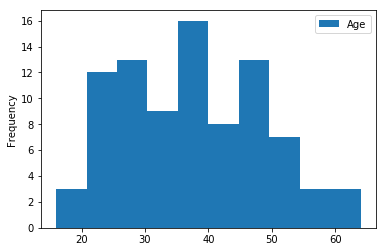

In [120]:
df[df.isMother==1][['Age']].plot(kind='hist')

In [121]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].isMother)

isMother,0,1
Survived,,
0,533,16
1,302,40


In [122]:
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
6        NaN
7        E46
        ... 
1303     C78
1304     NaN
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [123]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [129]:
df.loc[df.Cabin=='T','Cabin']=np.NAN

In [132]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

In [133]:
df["Deck"]=df.Cabin.map(lambda x:get_deck(x))

In [137]:
df['Deck'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [139]:
pd.crosstab(df[df.Survived!=-888].Deck,df[df.Survived!=-888].Survived)

Survived,0,1
Deck,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
Z,482,206


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age            1309 non-null float64
Cabin          294 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Title          1309 non-null object
Fare_Bin       1308 non-null category
AgeState       1309 non-null object
Family_Size    1309 non-null int64
isMother       1309 non-null int32
Deck           1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 210.2+ KB


In [146]:
%%HTML
<h1>CATEGORICAL FEATURE ENCODING</h1>
<h2>BINARY ENCODING</h2>
<h2>LABEL ENCODING</h2>
<h2>ONE HOT ENCODING</h2>

In [147]:
df.Embarked

PassengerId
1       S
2       C
3       S
4       S
5       S
6       Q
7       S
       ..
1303    Q
1304    S
1305    S
1306    C
1307    S
1308    S
1309    C
Name: Embarked, Length: 1309, dtype: object

In [149]:
%%HTML
<h2>CATEGORICAL FEATURE ENCODING</h2>

In [150]:
df['isMale']=np.where(df.Sex=='male',1,0)

In [152]:
df=pd.get_dummies(df,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState']);

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 50 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1308 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
Family_Size           1309 non-null int64
isMother              1309 non-null int32
isMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

In [154]:
df.Ticket

PassengerId
1                A/5 21171
2                 PC 17599
3         STON/O2. 3101282
4                   113803
5                   373450
6                   330877
7                    17463
               ...        
1303                 19928
1304                347086
1305             A.5. 3236
1306              PC 17758
1307    SOTON/O.Q. 3101262
1308                359309
1309                  2668
Name: Ticket, Length: 1309, dtype: object

In [156]:
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis=1,inplace=True)

In [157]:
columns=[column for column in df.columns if column!='Survived']
columns=['Survived']+columns
df=df[columns]

In [159]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 44 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1308 non-null float64
Family_Size           1309 non-null int64
isMother              1309 non-null int32
isMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_capt            1309 non-null uint8
Title_col             1309 non-null uint8
Title_don             1309 non-null uint8
Title_dona            1309 non-null uint8
Title_d

In [160]:
%%HTML
<h1>SAVE PROCESSED DATA</h1>

In [162]:
processed_data_path=os.path.join(os.path.pardir,'data','processed')
write_train_path=os.path.join(processed_data_path,'train.csv')
write_test_path=os.path.join(processed_data_path,'test.csv')

In [164]:
df.loc[df.Survived!=-888].to_csv(write_train_path)
df.loc[df.Survived==-888].to_csv(write_test_path)

In [166]:
%%HTML
<h2> Building the data processing script</h2>

In [167]:
#to be done later


In [169]:
%%html
<h1> ADVANCED VISUALIZATIONS USING MAT</h1>

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Counts')

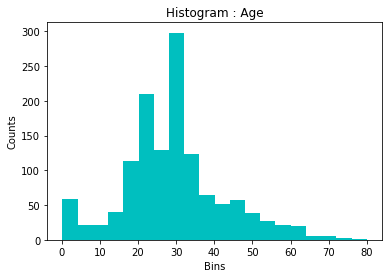

In [179]:
plt.hist(df.Age,bins=20,color='c');
plt.title('Histogram : Age')
plt.xlabel('Bins')
plt.ylabel('Counts')

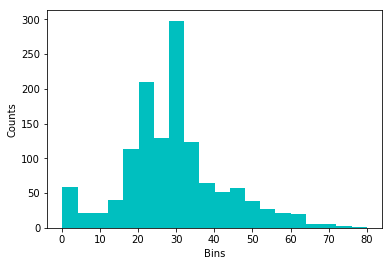

In [183]:
f,ax=plt.subplots()
ax.hist(df.Age,bins=20,color='c')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

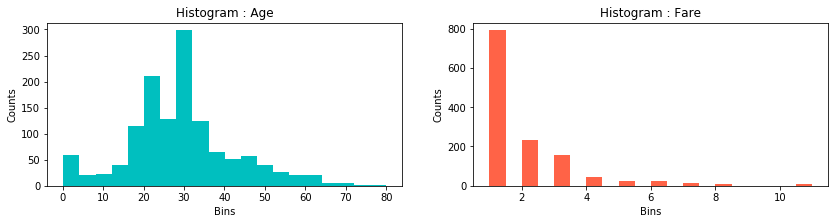

In [193]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(14,3))
ax1.hist(df.Age,bins=20,color='c')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')
ax1.set_title('Histogram : Age')

ax2.hist(df.Family_Size,bins=20,color='tomato')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')
ax2.set_title('Histogram : Fare')

plt.show()

In [192]:
df.Fare

PassengerId
1         7.2500
2        71.2833
3         7.9250
4        53.1000
5         8.0500
6         8.4583
7        51.8625
          ...   
1303     90.0000
1304      7.7750
1305      8.0500
1306    108.9000
1307      7.2500
1308      8.0500
1309     22.3583
Name: Fare, Length: 1309, dtype: float64

In [194]:
#Multiple plots can be made using array indexing, to avoid overlapping use plt.tight_layout()

In [195]:
# remove a plot -> ax[2,2].axis('off')